In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')
## グラフで日本語表示
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IPAPGothic'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
rcParams["font.size"] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
import gc


drop_columns = ["category","media_name","account_name","campaign_name","adgroup_name"]
def delete_fractional_portion(id):
    if id.endswith(".0"):
        return id[:-2]
    return id
def read_pitch(path, encoding=None,delimiter=None):
    _df = pd.read_csv(path, encoding=encoding,delimiter=delimiter)
    _df["tfs_zulu"] = pd.to_datetime(_df["tfs_zulu"])
    return _df.sort_values(by=["gid", "tfs_zulu"])
pd.set_option('display.max_columns', 150)

In [2]:
p_df=read_pitch("pitch_df.csv")
p_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid
109486,1,top,608665,446359,R,SI,93.7,84.5,233.718,2632.270,-10.721801,7.870604,0.239615,1.848781,-0.869064,50.0,-19.911162,32.791492,-17.557766,6.687156,-136.134526,-7.015046,3.311768,1.564115,23.7,43.7,5.8,9.0,46.0,NaN,NaN,S,C,3,Called Strike,2018-03-29 20:07:39+00:00,gid_2018_03_29_anamlb_oakmlb_1
109487,1,top,608665,446359,R,SI,94.0,85.8,236.246,2561.181,-10.647298,7.115135,-0.804047,0.925201,-0.942066,50.0,-20.043108,30.911711,-18.780096,4.093632,-136.551337,-9.145946,3.647501,1.601877,23.8,42.7,6.1,13.0,46.0,NaN,NaN,B,B,4,Ball,2018-03-29 20:08:07+00:00,gid_2018_03_29_anamlb_oakmlb_1
109488,1,top,608665,446359,R,SI,94.7,86.5,237.996,2673.854,-11.206094,7.003230,0.598637,1.616677,-0.705522,50.0,-21.510485,30.321994,-18.731107,7.501741,-137.628790,-7.507958,3.297457,1.426851,23.8,44.4,6.0,9.0,53.0,NaN,NaN,S,C,5,Called Strike,2018-03-29 20:08:21+00:00,gid_2018_03_29_anamlb_oakmlb_1
109489,1,top,608665,446359,R,SL,82.3,76.7,38.861,959.909,3.397188,-4.215796,1.453223,1.466314,-0.732282,50.0,4.974062,21.571764,-38.346692,4.136962,-119.812434,-2.125677,3.230198,1.360572,23.9,-8.2,10.8,14.0,22.0,NaN,NaN,S,F,6,Foul,2018-03-29 20:08:39+00:00,gid_2018_03_29_anamlb_oakmlb_1
109490,1,top,608665,446359,R,SI,95.4,87.1,241.080,2408.148,-10.308374,5.695114,-0.427914,2.490041,-0.802268,50.0,-20.172978,30.364878,-21.028992,4.703063,-138.845494,-5.049660,3.230198,1.360572,23.8,40.9,6.1,4.0,36.0,NaN,NaN,S,S,7,Swinging Strike,2018-03-29 20:09:01+00:00,gid_2018_03_29_anamlb_oakmlb_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26354,9,bottom,532077,596146,L,FF,94.8,87.0,208.768,1793.668,-4.243990,7.729574,0.183655,0.476526,-0.763285,50.0,-8.192738,28.954913,-17.252624,4.083515,-137.684707,-10.794738,3.350834,1.770833,23.8,20.8,4.4,14.0,17.0,NaN,NaN,B,*B,660,Ball In Dirt,2018-05-01 03:22:16+00:00,gid_2018_04_30_tormlb_minmlb_1
26355,9,bottom,532077,596146,L,FF,95.1,87.3,190.795,2176.630,-1.999436,10.484982,0.362698,1.706776,-0.678068,50.0,-3.882658,29.409999,-11.813509,3.554656,-138.153599,-8.933124,3.268481,1.379419,23.8,13.0,2.9,9.0,37.0,NaN,NaN,X,D,661,"In play, no out",2018-05-01 03:22:45+00:00,gid_2018_04_30_tormlb_minmlb_1
26356,9,bottom,532077,543257,L,FC,92.5,86.3,162.504,1417.584,2.114254,6.706561,0.930158,1.323195,-0.774186,50.0,3.952764,23.741648,-19.635606,3.826519,-134.545828,-8.197717,3.322537,1.720062,23.9,-12.2,4.6,14.0,75.0,NaN,NaN,B,B,667,Ball,2018-05-01 03:23:46+00:00,gid_2018_04_30_tormlb_minmlb_1
26357,9,bottom,532077,543257,L,FC,91.9,86.5,160.543,1254.130,2.060806,5.833060,0.690936,2.797426,-0.776815,50.0,3.857862,20.777711,-21.254469,3.209752,-133.969243,-4.367918,3.312007,1.720062,24.0,-11.1,4.8,3.0,40.0,NaN,NaN,S,F,668,Foul,2018-05-01 03:24:07+00:00,gid_2018_04_30_tormlb_minmlb_1


In [3]:
p_df.sort_values(by="spin_rate", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid
75318,7,top,543118,542303,R,CU,79.7,78.3,29.793,6503.791,17.779539,-31.052488,0.432227,1.696940,1.280122,50.0,25.763879,7.393863,-77.171421,-7.476743,-115.662976,11.243198,3.434615,1.404008,24.2,-18.4,22.2,9.0,32.0,NaN,NaN,S,S,407,Swinging Strike,2018-04-05 01:32:15+00:00,gid_2018_04_04_slnmlb_milmlb_1
81190,6,bottom,572020,624585,R,FF,96.6,88.8,157.690,6122.968,11.892798,28.981066,0.690724,3.001862,1.710254,50.0,22.356344,44.946248,22.305201,-6.892442,-139.529668,-12.304510,3.414375,1.445813,23.5,227.7,5.9,3.0,46.0,NaN,NaN,X,D,409,"In play, no out",2018-04-11 20:04:51+00:00,gid_2018_04_11_seamlb_kcamlb_1
8776,1,top,448855,571697,L,FF,95.8,84.4,173.630,5189.818,2.933627,26.269562,0.682273,1.910063,-0.978041,50.0,5.488818,40.372251,16.976319,3.448579,-138.250839,-14.773393,3.024208,1.275258,23.6,207.4,3.1,6.0,43.0,NaN,NaN,X,X,35,"In play, out(s)",2018-04-17 23:50:34+00:00,gid_2018_04_17_cinmlb_milmlb_1
8812,3,top,448855,571740,L,FF,93.5,82.4,163.692,4760.372,6.979662,23.854494,0.633729,2.578892,-0.305947,50.0,12.464596,39.453156,10.426384,0.101593,-135.273269,-11.667188,3.316112,1.396044,23.6,240.7,3.3,6.0,39.0,NaN,NaN,X,X,118,"In play, out(s)",2018-04-18 00:15:10+00:00,gid_2018_04_17_cinmlb_milmlb_1
11117,7,top,518748,641553,R,FF,94.2,82.8,182.818,4754.468,-1.204702,24.455268,-0.143714,1.569827,-0.692526,50.0,-2.197812,38.405160,12.441218,1.871707,-136.304322,-14.787997,3.467334,1.564483,23.6,168.6,1.9,8.0,51.0,NaN,NaN,S,C,420,Called Strike,2018-04-01 01:19:09+00:00,gid_2018_03_31_chamlb_kcamlb_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113959,7,top,641438,595751,R,NaN,94.0,85.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,C,376,Called Strike,2018-04-17 01:33:39+00:00,gid_2018_04_16_phimlb_atlmlb_1
113960,7,top,641438,595751,R,NaN,85.2,78.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,377,"In play, out(s)",2018-04-17 01:33:58+00:00,gid_2018_04_16_phimlb_atlmlb_1
113961,7,top,641438,514917,L,NaN,94.8,86.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,383,Ball,2018-04-17 01:35:04+00:00,gid_2018_04_16_phimlb_atlmlb_1
113966,7,top,641438,664068,R,NaN,94.0,86.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,C,391,Called Strike,2018-04-17 01:37:06+00:00,gid_2018_04_16_phimlb_atlmlb_1


In [4]:
p_df[p_df["pitcher_id"]==572020].groupby("pitch_type")[["spin_rate"]].agg(["min","mean","median", "max"]).reset_index()#.mean().reset_index()

pitch_type spin_rate                                 
                   min         mean    median       max
0         CH  1524.537  1916.204500  1935.646  2155.964
1         FC   256.972   749.027234   722.520  1371.567
2         FF  1961.151  2612.059504  2603.818  6122.968
3         KC   162.310   941.522163   924.075  2122.240

In [5]:
p_df.groupby("pitch_type")[["spin_rate"]].agg(["min","mean","median", "max"]).reset_index().sort_values(by=("spin_rate","median"),ascending=False)

pitch_type spin_rate                                  
                    min         mean     median       max
7          FT   518.579  2218.710450  2259.2860  3391.408
4          FF   484.067  2170.609342  2202.7460  6122.968
11         SI   703.241  2167.840423  2185.2080  3663.240
9          PO  1342.073  1947.455571  1999.7780  2359.764
5          FO  1230.473  1870.526722  1902.6360  2315.755
0          CH   233.514  1797.966200  1832.2700  3377.311
10         SC  1470.591  1694.798333  1732.4380  1881.366
2          EP  1156.836  1548.600750  1547.3875  1875.807
6          FS   191.965  1406.001737  1394.0790  3033.568
1          CU    25.448  1263.088517  1324.4600  6503.791
8          KC    10.703  1160.511520  1243.7180  2426.804
3          FC    38.561  1057.224730   993.8200  2981.388
12         SL     8.167   766.802573   696.6235  2875.701

In [6]:
p_type = pd.DataFrame(p_df["pitch_type"].unique()).reset_index()
p_type.columns = ["pitch_type_id", "pitch_type"]
p_type

,pitch_type_id,pitch_type
0,0,SI
1,1,SL
2,2,FF
3,3,FC
4,4,CU
5,5,CH
6,6,FT
7,7,FS
8,8,KC
9,9,EP


In [7]:
p_df = pd.merge(p_df, p_type, how="inner", on="pitch_type")

In [8]:
p_df[p_df["gid"]=="gid_2018_04_01_anamlb_oakmlb_1"]["pitcher_id"].unique()

array([543056, 502028, 660271, 605254, 592135, 433586, 641871, 433589,
       488748, 501822, 453284])

In [9]:
p_df.groupby("pitcher_id").count().reset_index().sort_values(by="px", ascending=False)

,pitcher_id,inning_num,top_bottom,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
215,545333,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,0,0,655,651,655,655,655,655,655
49,453286,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,0,0,620,618,620,620,620,620,620
156,519144,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,0,0,602,600,602,602,602,602,602
250,572020,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,0,0,601,600,601,601,601,601,601
188,543037,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,0,0,600,598,600,600,600,600,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,446399,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10,10,10,10,10
286,592407,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,8,8,8,8,8,8,8
330,595928,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,7,7,7,7,7,7,7
174,534606,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,5,5,5,5,5


In [10]:
names_df = pd.read_csv("other_data/mlb-pitch-data-20152018/player_names.csv")
names_df[names_df["last_name"]=="Ohtani"]

,id,first_name,last_name
1152,660271,Shohei,Ohtani


In [11]:
names_df[names_df["id"].isin([605254, 660271, 433589, 488748, 501822, 543056, 592135, 433586,
       502028, 453284, 641871])]

,id,first_name,last_name
92,501822,Chris,Hatcher
103,433586,Santiago,Casilla
159,433589,Yusmeiro,Petit
407,592135,Cam,Bedrosian
466,543056,Danny,Coulombe
741,488748,Ryan,Buchter
748,502028,Blake,Wood
892,453284,Blake,Parker
993,641871,Keynan,Middleton
1033,605254,Daniel,Gossett


In [12]:
names_df[names_df["id"] == 572020]

,id,first_name,last_name
119,572020,James,Paxton


In [13]:
ohtani = 660271
ohtani_df = p_df[p_df["pitcher_id"]==ohtani]
ohtani_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
12762,1,bottom,660271,543760,R,SL,81.5,74.7,106.612,1415.788,7.778194,2.320582,0.209670,3.433696,-2.237738,50.0,11.101823,22.703018,-28.861880,3.368222,-118.717215,0.028016,3.329010,1.459250,23.8,-22.0,8.8,12.0,33.0,NaN,NaN,S,S,25,Swinging Strike,2018-04-01 20:14:09+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12763,1,bottom,660271,543760,R,SL,83.6,76.8,120.709,1467.112,7.010907,4.164236,0.239599,3.669399,-2.227319,50.0,10.581381,22.471270,-25.889075,3.746613,-121.701608,-0.279185,3.586549,1.657899,23.8,-23.4,7.6,12.0,33.0,NaN,NaN,B,B,26,Ball,2018-04-01 20:14:29+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12764,1,bottom,660271,476704,L,SL,83.7,76.4,121.516,1375.461,6.536371,4.007907,-0.970258,4.208338,-2.373291,50.0,9.854621,23.627923,-26.131491,1.333821,-121.926649,0.969022,3.567411,1.665165,23.8,-21.2,7.5,11.0,36.0,NaN,NaN,B,B,35,Ball,2018-04-01 20:16:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12769,2,bottom,660271,501981,R,SL,81.7,75.2,103.904,1004.585,5.545926,1.372928,-0.383614,3.026456,-2.297629,50.0,7.993412,21.428396,-30.195231,2.808068,-118.922180,-0.911539,3.803499,1.705152,23.9,-15.5,8.8,4.0,56.0,NaN,NaN,S,C,92,Called Strike,2018-04-01 20:32:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12770,2,bottom,660271,501981,R,SL,82.2,75.1,107.146,1501.554,8.150797,2.514680,-0.404470,4.053447,-2.279994,50.0,11.838293,22.874340,-28.521704,1.930547,-119.699813,1.039250,3.389016,1.448805,23.8,-23.2,8.6,11.0,20.0,NaN,NaN,S,S,93,Swinging Strike,2018-04-01 20:33:16+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117586,5,bottom,660271,502210,L,FS,90.5,84.6,274.432,889.414,-4.514270,-0.349859,0.570176,0.556914,-2.139586,50.0,-8.044629,23.760287,-32.797513,8.625387,-131.614786,-6.603743,3.325484,1.617752,23.9,11.2,7.8,14.0,19.0,NaN,NaN,B,*B,356,Ball In Dirt,2018-04-25 02:02:03+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117587,5,bottom,660271,502210,L,FS,92.4,85.8,220.854,968.775,-3.212552,3.714547,1.343145,-0.252612,-2.204226,50.0,-5.850162,28.211939,-25.409738,10.494817,-133.927214,-10.155153,3.315424,1.617752,23.8,8.0,6.2,14.0,7.0,NaN,NaN,B,*B,359,Ball In Dirt,2018-04-25 02:03:59+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117588,5,bottom,660271,502210,L,FS,87.8,81.1,250.258,917.944,-4.577982,1.642920,-0.368473,1.902284,-2.229354,50.0,-7.606976,24.893680,-29.444101,6.208605,-127.733180,-3.664128,3.104159,1.406368,23.8,12.2,7.5,7.0,25.0,NaN,NaN,X,X,361,"In play, out(s)",2018-04-25 02:05:31+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117589,6,bottom,660271,493329,R,FS,89.9,83.7,243.593,925.862,-4.258224,2.114416,0.678559,0.847462,-2.279318,50.0,-7.466122,23.677361,-28.466756,9.113390,-130.619073,-7.090210,3.466303,1.587563,23.9,11.4,7.0,14.0,26.0,NaN,NaN,B,B,397,Ball,2018-04-25 02:19:17+00:00,gid_2018_04_24_anamlb_houmlb_1,7


In [14]:
all_df = pd.merge(p_df, names_df, how="left", left_on="pitcher_id", right_on="id")
all_df.sort_values(by="start_speed", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id,id,first_name,last_name
72239,8,top,594027,465753,L,FF,101.8,92.1,217.779,2554.561,-7.220808,9.315675,1.061475,3.261671,-1.937930,50.0,-15.946865,35.899057,-11.600754,11.480844,-147.829145,-6.167805,3.527943,1.593853,23.8,45.2,3.4,12.0,55.0,NaN,NaN,B,B,591,Ball,2018-05-01 02:00:00+00:00,gid_2018_04_30_phimlb_miamlb_1,2,594027,Tayron,Guerrero
6068,7,bottom,663855,592178,R,SI,101.7,93.0,231.453,2238.655,-8.061654,6.423136,0.078780,2.962819,-1.505200,50.0,-17.832327,35.031254,-17.966113,7.677524,-147.759885,-5.645244,3.344942,1.527266,23.8,39.8,4.6,2.0,30.0,NaN,NaN,X,X,495,"In play, out(s)",2018-04-18 02:33:35+00:00,gid_2018_04_17_slnmlb_chnmlb_1,0,663855,Jordan,Hicks
6073,7,bottom,663855,575929,R,SI,101.7,93.6,242.447,1987.559,-8.089230,4.220448,-0.705427,2.039668,-1.487868,50.0,-17.959939,34.324234,-22.803691,5.359339,-147.865177,-7.340062,3.380511,1.420804,23.8,34.4,5.4,7.0,48.0,NaN,NaN,S,F,509,Foul,2018-04-18 02:37:09+00:00,gid_2018_04_17_slnmlb_chnmlb_1,0,663855,Jordan,Hicks
399,7,bottom,663855,457803,L,SI,101.6,92.3,251.327,2326.605,-10.190558,3.443818,-0.838431,1.571329,-1.414427,50.0,-22.444497,36.305168,-24.589109,5.530730,-147.731019,-7.996586,3.473391,1.657202,23.8,38.6,6.2,13.0,73.0,NaN,NaN,B,B,530,Ball,2018-03-29 19:44:44+00:00,gid_2018_03_29_slnmlb_nynmlb_1,0,663855,Jordan,Hicks
2370,9,top,663855,572041,R,SI,101.4,91.7,235.192,2521.141,-9.679468,6.729272,0.357905,1.346320,-1.097184,50.0,-20.985654,38.207980,-17.584592,7.836204,-147.076838,-9.506440,3.531509,1.646192,23.7,43.6,5.2,14.0,50.0,NaN,NaN,B,B,606,Ball,2018-04-06 02:39:13+00:00,gid_2018_04_05_arimlb_slnmlb_1,0,663855,Jordan,Hicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81887,8,bottom,592407,656555,R,CU,61.6,55.5,164.877,433.139,0.882297,3.264370,1.033411,2.356960,-1.617693,50.0,0.694773,15.501441,-29.603488,4.425192,-89.187811,2.827660,3.811817,1.501221,23.7,-2.7,15.1,14.0,36.0,NaN,NaN,S,S,688,Swinging Strike,2018-04-08 01:22:53+00:00,gid_2018_04_07_miamlb_phimlb_1,4,592407,Bryan,Holaday
88806,8,top,628318,408236,L,CU,60.3,54.4,135.336,970.923,5.377809,5.441175,-2.090536,0.534812,-1.409039,50.0,4.107480,13.501084,-28.018170,-2.366265,-87.309945,6.318074,3.709750,1.712701,23.7,-7.9,14.6,13.0,60.0,NaN,NaN,B,B,653,Ball,2018-04-29 23:04:50+00:00,gid_2018_04_29_nynmlb_sdnmlb_1,4,628318,Kazuhisa,Makita
88070,8,top,628318,624424,L,CU,58.6,51.8,133.972,1101.816,6.520601,6.290534,0.620568,3.389424,-1.202298,50.0,4.604881,13.307105,-27.731641,1.615428,-84.248889,10.830251,3.247929,1.458328,23.7,-10.6,15.3,12.0,91.0,NaN,NaN,B,B,427,Ball,2018-04-28 04:10:34+00:00,gid_2018_04_27_nynmlb_sdnmlb_1,4,628318,Kazuhisa,Makita
87105,7,bottom,628318,596115,R,CU,58.1,52.9,107.516,815.042,6.292184,1.985862,-0.013290,2.059907,-1.314893,50.0,4.488754,10.940543,-30.757363,0.801411,-83.784928,9.592108,3.557388,1.593475,23.8,-8.9,17.0,8.0,59.0,NaN,NaN,S,C,440,Called Strike,2018-04-25 03:25:39+00:00,gid_2018_04_24_sdnmlb_colmlb_1,4,628318,Kazuhisa,Makita


In [15]:
chapman = 547973
chapman_df = p_df[p_df["pitcher_id"]==chapman]
chapman_df.groupby("pitch_type").mean().reset_index()

,pitch_type,inning_num,pitcher_id,batter_id,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,event_num,pitch_type_id
0,FF,9.094828,547973.0,525629.629310,98.087931,88.871552,168.023353,2425.386664,2.423185,11.311368,-0.089202,2.550767,0.775240,50.0,4.969758,34.587941,-9.000086,-3.313990,-142.658289,-7.929742,3.380888,1.471404,23.760345,-20.394828,2.375862,9.043103,41.362069,NaN,NaN,593.948276,2.0
1,SI,9.136364,547973.0,484335.909091,100.177273,90.900000,141.423955,2553.985136,7.444258,9.356054,0.381696,3.100596,0.630532,50.0,15.959964,35.575827,-12.132075,-3.491496,-145.770434,-6.360155,3.323921,1.448190,23.768182,-48.004545,3.872727,10.136364,42.954545,NaN,NaN,581.454545,0.0
2,SL,9.019231,547973.0,528183.673077,85.775000,78.559615,251.296154,1200.589981,-5.955201,2.058777,0.074955,2.010612,0.781922,50.0,-9.351906,25.834417,-28.910060,0.147563,-124.851915,-4.187189,3.333790,1.460410,23.813462,17.405769,8.067308,10.576923,36.134615,NaN,NaN,605.500000,1.0


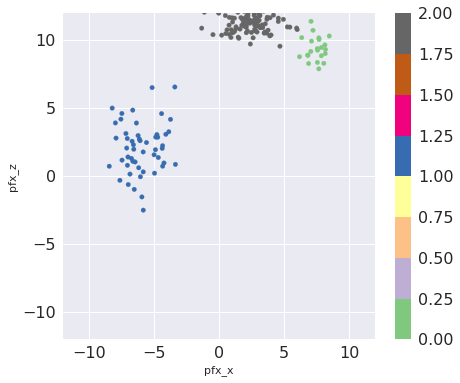

In [16]:
import matplotlib.cm as cm
chapman_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=chapman_df["pitch_type_id"], cmap=cm.Accent)

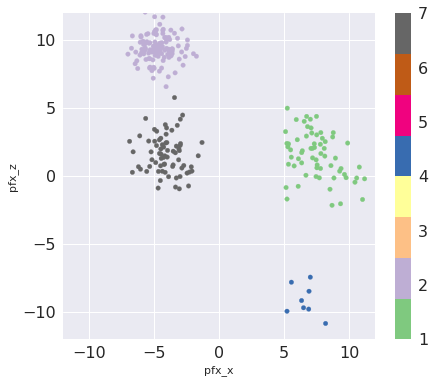

In [17]:
ohtani_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=ohtani_df["pitch_type_id"], cmap=cm.Accent)

[]

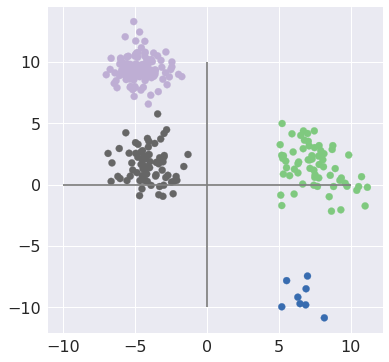

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(x=ohtani_df["pfx_x"], y=ohtani_df["pfx_z"], c=ohtani_df["pitch_type_id"], cmap=cm.Accent)
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.plot()

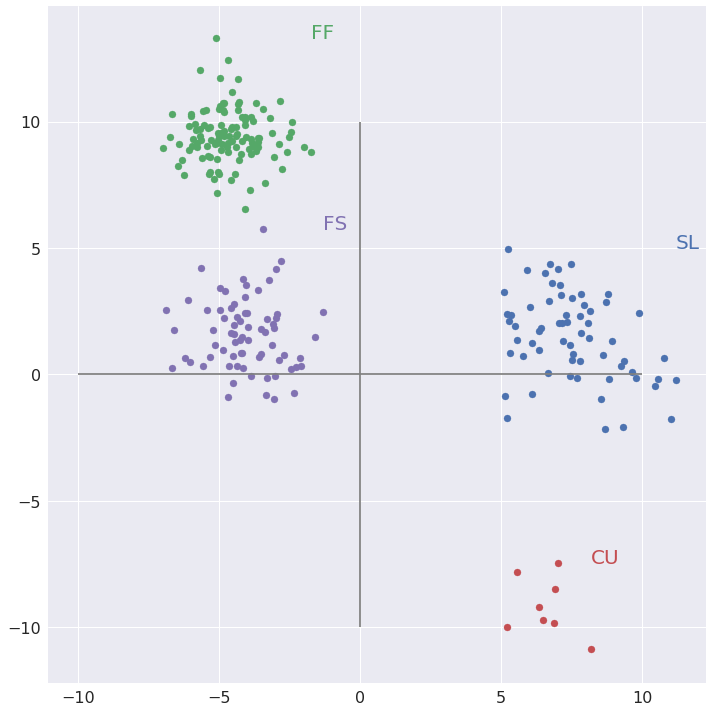

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10),tight_layout=True)

x_term = "pfx_x"
y_term = "pfx_z"

for ball_type in ohtani_df["pitch_type"].unique():
    tmp_df = ohtani_df[ohtani_df["pitch_type"]==ball_type]
    path = ax.scatter(x=tmp_df[x_term], y=tmp_df[y_term])
    plt.text(tmp_df[x_term].max(), tmp_df[y_term].max(), ball_type, fontsize=20, color=path.get_facecolor()[0])
#     print(path.get_facecolor()[0])
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.show()

* 球種別被打率
* 直前の球種・コース・速度など属性に入れて決定木で打たれる打たれないの分類  
　直前の球種・コース・速度と交互作用項も入れて  
　→ 何が打たれやすいか（球種・速度・直前の球種との兼ね合いとかとか）

In [20]:
ohtani_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
12762,1,bottom,660271,543760,R,SL,81.5,74.7,106.612,1415.788,7.778194,2.320582,0.209670,3.433696,-2.237738,50.0,11.101823,22.703018,-28.861880,3.368222,-118.717215,0.028016,3.329010,1.459250,23.8,-22.0,8.8,12.0,33.0,NaN,NaN,S,S,25,Swinging Strike,2018-04-01 20:14:09+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12763,1,bottom,660271,543760,R,SL,83.6,76.8,120.709,1467.112,7.010907,4.164236,0.239599,3.669399,-2.227319,50.0,10.581381,22.471270,-25.889075,3.746613,-121.701608,-0.279185,3.586549,1.657899,23.8,-23.4,7.6,12.0,33.0,NaN,NaN,B,B,26,Ball,2018-04-01 20:14:29+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12764,1,bottom,660271,476704,L,SL,83.7,76.4,121.516,1375.461,6.536371,4.007907,-0.970258,4.208338,-2.373291,50.0,9.854621,23.627923,-26.131491,1.333821,-121.926649,0.969022,3.567411,1.665165,23.8,-21.2,7.5,11.0,36.0,NaN,NaN,B,B,35,Ball,2018-04-01 20:16:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12769,2,bottom,660271,501981,R,SL,81.7,75.2,103.904,1004.585,5.545926,1.372928,-0.383614,3.026456,-2.297629,50.0,7.993412,21.428396,-30.195231,2.808068,-118.922180,-0.911539,3.803499,1.705152,23.9,-15.5,8.8,4.0,56.0,NaN,NaN,S,C,92,Called Strike,2018-04-01 20:32:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
12770,2,bottom,660271,501981,R,SL,82.2,75.1,107.146,1501.554,8.150797,2.514680,-0.404470,4.053447,-2.279994,50.0,11.838293,22.874340,-28.521704,1.930547,-119.699813,1.039250,3.389016,1.448805,23.8,-23.2,8.6,11.0,20.0,NaN,NaN,S,S,93,Swinging Strike,2018-04-01 20:33:16+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117586,5,bottom,660271,502210,L,FS,90.5,84.6,274.432,889.414,-4.514270,-0.349859,0.570176,0.556914,-2.139586,50.0,-8.044629,23.760287,-32.797513,8.625387,-131.614786,-6.603743,3.325484,1.617752,23.9,11.2,7.8,14.0,19.0,NaN,NaN,B,*B,356,Ball In Dirt,2018-04-25 02:02:03+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117587,5,bottom,660271,502210,L,FS,92.4,85.8,220.854,968.775,-3.212552,3.714547,1.343145,-0.252612,-2.204226,50.0,-5.850162,28.211939,-25.409738,10.494817,-133.927214,-10.155153,3.315424,1.617752,23.8,8.0,6.2,14.0,7.0,NaN,NaN,B,*B,359,Ball In Dirt,2018-04-25 02:03:59+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117588,5,bottom,660271,502210,L,FS,87.8,81.1,250.258,917.944,-4.577982,1.642920,-0.368473,1.902284,-2.229354,50.0,-7.606976,24.893680,-29.444101,6.208605,-127.733180,-3.664128,3.104159,1.406368,23.8,12.2,7.5,7.0,25.0,NaN,NaN,X,X,361,"In play, out(s)",2018-04-25 02:05:31+00:00,gid_2018_04_24_anamlb_houmlb_1,7
117589,6,bottom,660271,493329,R,FS,89.9,83.7,243.593,925.862,-4.258224,2.114416,0.678559,0.847462,-2.279318,50.0,-7.466122,23.677361,-28.466756,9.113390,-130.619073,-7.090210,3.466303,1.587563,23.9,11.4,7.0,14.0,26.0,NaN,NaN,B,B,397,Ball,2018-04-25 02:19:17+00:00,gid_2018_04_24_anamlb_houmlb_1,7


In [21]:
p_df
names_df
with_name = pd.merge(p_df, names_df, left_on="pitcher_id", right_on="id")

In [22]:
with_name.sort_values(by="start_speed", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id,id,first_name,last_name
30968,8,top,594027,465753,L,FF,101.8,92.1,217.779,2554.561,-7.220808,9.315675,1.061475,3.261671,-1.937930,50.0,-15.946865,35.899057,-11.600754,11.480844,-147.829145,-6.167805,3.527943,1.593853,23.8,45.2,3.4,12.0,55.0,NaN,NaN,B,B,591,Ball,2018-05-01 02:00:00+00:00,gid_2018_04_30_phimlb_miamlb_1,2,594027,Tayron,Guerrero
7365,7,bottom,663855,592178,R,SI,101.7,93.0,231.453,2238.655,-8.061654,6.423136,0.078780,2.962819,-1.505200,50.0,-17.832327,35.031254,-17.966113,7.677524,-147.759885,-5.645244,3.344942,1.527266,23.8,39.8,4.6,2.0,30.0,NaN,NaN,X,X,495,"In play, out(s)",2018-04-18 02:33:35+00:00,gid_2018_04_17_slnmlb_chnmlb_1,0,663855,Jordan,Hicks
7370,7,bottom,663855,575929,R,SI,101.7,93.6,242.447,1987.559,-8.089230,4.220448,-0.705427,2.039668,-1.487868,50.0,-17.959939,34.324234,-22.803691,5.359339,-147.865177,-7.340062,3.380511,1.420804,23.8,34.4,5.4,7.0,48.0,NaN,NaN,S,F,509,Foul,2018-04-18 02:37:09+00:00,gid_2018_04_17_slnmlb_chnmlb_1,0,663855,Jordan,Hicks
7287,7,bottom,663855,457803,L,SI,101.6,92.3,251.327,2326.605,-10.190558,3.443818,-0.838431,1.571329,-1.414427,50.0,-22.444497,36.305168,-24.589109,5.530730,-147.731019,-7.996586,3.473391,1.657202,23.8,38.6,6.2,13.0,73.0,NaN,NaN,B,B,530,Ball,2018-03-29 19:44:44+00:00,gid_2018_03_29_slnmlb_nynmlb_1,0,663855,Jordan,Hicks
7313,9,top,663855,572041,R,SI,101.4,91.7,235.192,2521.141,-9.679468,6.729272,0.357905,1.346320,-1.097184,50.0,-20.985654,38.207980,-17.584592,7.836204,-147.076838,-9.506440,3.531509,1.646192,23.7,43.6,5.2,14.0,50.0,NaN,NaN,B,B,606,Ball,2018-04-06 02:39:13+00:00,gid_2018_04_05_arimlb_slnmlb_1,0,663855,Jordan,Hicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90030,8,bottom,592407,656555,R,CU,61.6,55.5,164.877,433.139,0.882297,3.264370,1.033411,2.356960,-1.617693,50.0,0.694773,15.501441,-29.603488,4.425192,-89.187811,2.827660,3.811817,1.501221,23.7,-2.7,15.1,14.0,36.0,NaN,NaN,S,S,688,Swinging Strike,2018-04-08 01:22:53+00:00,gid_2018_04_07_miamlb_phimlb_1,4,592407,Bryan,Holaday
21151,8,top,628318,408236,L,CU,60.3,54.4,135.336,970.923,5.377809,5.441175,-2.090536,0.534812,-1.409039,50.0,4.107480,13.501084,-28.018170,-2.366265,-87.309945,6.318074,3.709750,1.712701,23.7,-7.9,14.6,13.0,60.0,NaN,NaN,B,B,653,Ball,2018-04-29 23:04:50+00:00,gid_2018_04_29_nynmlb_sdnmlb_1,4,628318,Kazuhisa,Makita
21149,8,top,628318,624424,L,CU,58.6,51.8,133.972,1101.816,6.520601,6.290534,0.620568,3.389424,-1.202298,50.0,4.604881,13.307105,-27.731641,1.615428,-84.248889,10.830251,3.247929,1.458328,23.7,-10.6,15.3,12.0,91.0,NaN,NaN,B,B,427,Ball,2018-04-28 04:10:34+00:00,gid_2018_04_27_nynmlb_sdnmlb_1,4,628318,Kazuhisa,Makita
21148,7,bottom,628318,596115,R,CU,58.1,52.9,107.516,815.042,6.292184,1.985862,-0.013290,2.059907,-1.314893,50.0,4.488754,10.940543,-30.757363,0.801411,-83.784928,9.592108,3.557388,1.593475,23.8,-8.9,17.0,8.0,59.0,NaN,NaN,S,C,440,Called Strike,2018-04-25 03:25:39+00:00,gid_2018_04_24_sdnmlb_colmlb_1,4,628318,Kazuhisa,Makita


In [23]:
p_df[p_df["pitcher_id"]==547973]

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
264,9,bottom,547973,434778,R,SI,100.2,90.9,135.821,2472.382,8.043847,8.277558,-0.023020,4.147402,0.318896,50.0,17.335538,34.695806,-14.334834,-3.994046,-145.964318,-3.273614,3.323557,1.454467,23.8,-47.3,4.2,11.0,18.0,NaN,NaN,S,F,601,Foul,2018-03-29 22:59:22+00:00,gid_2018_03_29_nyamlb_tormlb_1,0
265,9,bottom,547973,434778,R,SI,99.5,90.5,144.820,2286.547,6.176172,8.761438,0.300408,4.293402,0.450957,50.0,13.166803,33.458644,-13.495792,-2.729672,-144.996416,-3.123079,3.237473,1.675859,23.8,-41.4,3.6,12.0,29.0,NaN,NaN,S,S,602,Swinging Strike,2018-03-29 23:00:29+00:00,gid_2018_03_29_nyamlb_tormlb_1,0
621,9,bottom,547973,518626,R,SI,100.5,91.6,140.240,2632.943,7.857642,9.444026,0.059379,2.410336,0.506181,50.0,16.972614,35.216682,-11.774826,-4.231119,-146.220262,-8.178177,3.304541,1.405062,23.8,-49.3,4.0,5.0,21.0,NaN,NaN,S,F,503,Foul,2018-03-31 01:45:35+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
622,9,bottom,547973,475253,R,SI,100.8,91.7,135.788,2369.560,7.659606,7.873077,0.907567,2.758918,0.607910,50.0,16.724285,34.765022,-14.983664,-2.015733,-146.841021,-6.624882,3.355719,1.506648,23.8,-44.5,4.3,12.0,53.0,NaN,NaN,S,S,510,Swinging Strike,2018-03-31 01:48:06+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
623,9,bottom,547973,456665,R,SI,100.2,91.4,142.411,2475.078,7.045909,9.152552,-0.152844,1.341939,0.638517,50.0,15.153983,33.643120,-12.489206,-4.910409,-145.613991,-10.485022,3.497478,1.627164,23.8,-43.4,3.9,13.0,42.0,NaN,NaN,B,B,520,Ball,2018-03-31 01:50:19+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70972,9,bottom,547973,425784,R,FF,97.2,86.9,153.584,2491.034,5.435409,10.941144,1.274242,2.972652,0.884578,50.0,10.795366,37.556168,-10.443640,-0.870204,-141.314716,-6.444598,3.534331,1.576965,23.7,-41.0,3.3,12.0,64.0,NaN,NaN,B,B,553,Ball,2018-04-30 03:02:15+00:00,gid_2018_04_29_nyamlb_anamlb_1,2
70973,9,bottom,547973,425784,R,FF,96.7,87.3,150.880,2503.178,5.995418,10.762221,0.444336,1.408064,0.809173,50.0,11.790471,36.240749,-11.009279,-3.145035,-140.415481,-10.223679,3.325311,1.407630,23.7,-39.0,3.6,9.0,46.0,NaN,NaN,S,F,555,Foul,2018-04-30 03:02:56+00:00,gid_2018_04_29_nyamlb_anamlb_1,2
70974,9,bottom,547973,425784,R,FF,97.8,88.8,180.540,2512.066,-0.114232,12.088241,-0.718337,0.952547,0.668743,50.0,-0.232369,33.735653,-7.584348,-3.841134,-142.017855,-12.189604,3.325311,1.407630,23.8,6.1,2.1,13.0,36.0,NaN,NaN,S,F,557,Foul,2018-04-30 03:03:57+00:00,gid_2018_04_29_nyamlb_anamlb_1,2
70975,9,bottom,547973,425784,R,FF,99.4,89.7,158.586,2629.047,4.549745,11.600178,1.314212,3.313564,0.840604,50.0,9.571553,35.994061,-7.770107,-0.332234,-144.655266,-6.314637,3.325311,1.407630,23.7,-45.5,2.6,12.0,30.0,NaN,NaN,S,S,558,Swinging Strike,2018-04-30 03:04:43+00:00,gid_2018_04_29_nyamlb_anamlb_1,2


In [24]:
with_name[(with_name["pitch_type"]=="FF")|(with_name["pitch_type"]=="FT")|(with_name["pitch_type"]=="FA")].groupby(["pitcher_id","first_name","last_name"])[["spin_rate"]].mean().reset_index().sort_values(by="spin_rate",ascending=False).head(30)

,pitcher_id,first_name,last_name,spin_rate
13,434378,Justin,Verlander,2837.333679
472,664641,Ariel,Miranda,2676.853111
317,596720,Dovydas,Neverauskas,2660.309784
386,612434,Miguel,Castro,2652.189000
361,607231,John,Gant,2650.536050
414,624586,James,Hoyt,2637.729100
140,518858,Nate,Jones,2631.834940
234,572020,James,Paxton,2612.059504
324,605121,Justin,Anderson,2580.529214
256,592102,Cody,Allen,2576.821483


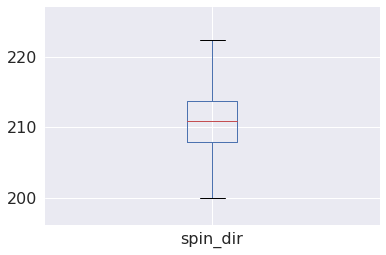

In [27]:
p_df[(p_df["pitcher_id"]==434378)&(p_df["pitch_type"]=="FF")][["spin_dir"]].boxplot()

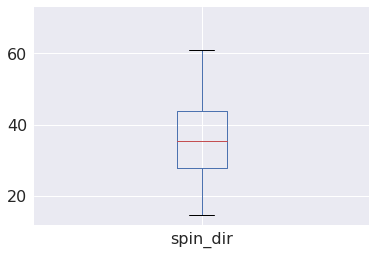

In [32]:
p_df[(p_df["pitcher_id"]==434378)&(p_df["pitch_type"]=="CU")][["spin_dir"]].boxplot()

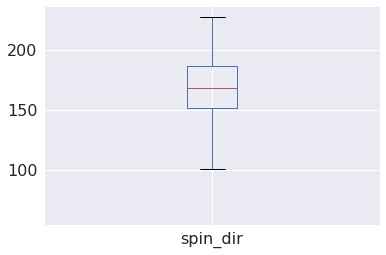

In [33]:
p_df[(p_df["pitcher_id"]==434378)&(p_df["pitch_type"]=="SL")][["spin_dir"]].boxplot()